<a href="https://colab.research.google.com/github/Park-New-project/2022_AI_Study_Course/blob/main/%5BAI%5D_221031.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
!pip install tensorflow==2.6.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install keras==2.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
df_read = pd.read_csv("/content/gdrive/MyDrive/Colab/data/wine.csv", header=None)
df_read

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [ ]:
df = df_read.sample(frac=1) # 전체 데이터가 많을 때 일부만 랜덤하게 data 추출
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
4975,6.6,0.18,0.28,1.70,0.041,53.0,161.0,0.99207,3.13,0.45,10.20,6,0
2455,8.2,0.38,0.49,13.60,0.042,58.0,166.0,0.99855,3.10,0.54,9.40,5,0
5534,7.0,0.46,0.20,16.70,0.046,50.0,184.0,0.99898,3.08,0.56,9.40,5,0
933,7.4,0.61,0.01,2.00,0.074,13.0,38.0,0.99748,3.48,0.65,9.80,5,1
6036,6.5,0.29,0.30,9.15,0.051,25.0,166.0,0.99339,3.24,0.56,11.35,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1945,5.6,0.34,0.10,1.30,0.031,20.0,68.0,0.99060,3.36,0.51,11.20,7,0
2172,7.2,0.20,0.34,2.70,0.032,49.0,151.0,0.99000,3.16,0.39,12.70,7,0
5487,6.0,0.28,0.24,17.80,0.047,42.0,111.0,0.99896,3.10,0.45,8.90,6,0
5385,7.4,0.29,0.48,12.80,0.037,61.5,182.0,0.99808,3.02,0.34,8.80,5,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 4975 to 2484
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6497 non-null   float64
 1   1       6497 non-null   float64
 2   2       6497 non-null   float64
 3   3       6497 non-null   float64
 4   4       6497 non-null   float64
 5   5       6497 non-null   float64
 6   6       6497 non-null   float64
 7   7       6497 non-null   float64
 8   8       6497 non-null   float64
 9   9       6497 non-null   float64
 10  10      6497 non-null   float64
 11  11      6497 non-null   int64  
 12  12      6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [ ]:
x=df.iloc[:,0:12]
x

,0,1,2,3,4,5,6,7,8,9,10,11
4975,6.6,0.18,0.28,1.70,0.041,53.0,161.0,0.99207,3.13,0.45,10.20,6
2455,8.2,0.38,0.49,13.60,0.042,58.0,166.0,0.99855,3.10,0.54,9.40,5
5534,7.0,0.46,0.20,16.70,0.046,50.0,184.0,0.99898,3.08,0.56,9.40,5
933,7.4,0.61,0.01,2.00,0.074,13.0,38.0,0.99748,3.48,0.65,9.80,5
6036,6.5,0.29,0.30,9.15,0.051,25.0,166.0,0.99339,3.24,0.56,11.35,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1945,5.6,0.34,0.10,1.30,0.031,20.0,68.0,0.99060,3.36,0.51,11.20,7
2172,7.2,0.20,0.34,2.70,0.032,49.0,151.0,0.99000,3.16,0.39,12.70,7
5487,6.0,0.28,0.24,17.80,0.047,42.0,111.0,0.99896,3.10,0.45,8.90,6
5385,7.4,0.29,0.48,12.80,0.037,61.5,182.0,0.99808,3.02,0.34,8.80,5


In [ ]:
y=df.iloc[:,12]
y

4975    0
2455    0
5534    0
933     1
6036    0
       ..
1945    0
2172    0
5487    0
5385    0
2484    0
Name: 12, Length: 6497, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, shuffle=True)

In [ ]:
x_train

,0,1,2,3,4,5,6,7,8,9,10,11
2248,7.1,0.260,0.34,14.40,0.067,35.0,189.0,0.99860,3.07,0.53,9.1,7
4179,7.7,0.300,0.26,18.95,0.053,36.0,174.0,0.99976,3.20,0.50,10.4,5
5675,7.4,0.370,0.26,9.60,0.050,33.0,134.0,0.99608,3.13,0.46,10.4,5
3217,6.4,0.370,0.49,13.30,0.045,53.0,243.0,0.99820,3.14,0.48,8.5,6
4338,6.8,0.320,0.28,4.80,0.034,25.0,100.0,0.99026,3.08,0.47,12.4,7
...,...,...,...,...,...,...,...,...,...,...,...,...
760,9.0,0.580,0.25,2.80,0.075,9.0,104.0,0.99779,3.23,0.57,9.7,5
259,10.0,0.310,0.47,2.60,0.085,14.0,33.0,0.99965,3.36,0.80,10.5,7
5678,5.4,0.265,0.28,7.80,0.052,27.0,91.0,0.99432,3.19,0.38,10.4,6
5122,6.0,0.230,0.15,9.70,0.048,101.0,207.0,0.99571,3.05,0.30,9.1,5


In [ ]:
x_test

,0,1,2,3,4,5,6,7,8,9,10,11
2288,6.7,0.17,0.37,2.00,0.039,34.0,125.0,0.99220,3.26,0.60,10.8,7
1158,6.7,0.41,0.43,2.80,0.076,22.0,54.0,0.99572,3.42,1.16,10.6,6
1949,6.3,0.12,0.36,2.10,0.044,47.0,146.0,0.99140,3.27,0.74,11.4,7
1156,8.5,0.18,0.51,1.75,0.071,45.0,88.0,0.99524,3.33,0.76,11.8,7
5690,6.4,0.14,0.28,7.90,0.057,21.0,82.0,0.99425,3.26,0.36,10.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...
482,10.6,0.36,0.59,2.20,0.152,6.0,18.0,0.99860,3.04,1.05,9.4,5
5169,6.9,0.26,0.27,4.20,0.031,20.0,80.0,0.99089,3.12,0.39,11.5,6
4564,5.5,0.34,0.26,2.20,0.021,31.0,119.0,0.98919,3.55,0.49,13.0,8
3693,6.6,0.22,0.53,15.10,0.052,22.0,136.0,0.99860,2.94,0.35,9.4,5


In [ ]:
y_train

2248    0
4179    0
5675    0
3217    0
4338    0
       ..
760     1
259     1
5678    0
5122    0
28      1
Name: 12, Length: 5197, dtype: int64

In [ ]:
y_test

2288    0
1158    1
1949    0
1156    1
5690    0
       ..
482     1
5169    0
4564    0
3693    0
5867    0
Name: 12, Length: 1300, dtype: int64

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 30)                390       
_________________________________________________________________
dense_5 (Dense)              (None, 12)                372       
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=50, batch_size=500, validation_split=0.25)

Epoch 1/50
8/8 [==============================] - 2s 91ms/step - loss: 14.9168 - accuracy: 0.2507 - val_loss: 8.7074 - val_accuracy: 0.2438
Epoch 2/50
8/8 [==============================] - 0s 12ms/step - loss: 5.7389 - accuracy: 0.1925 - val_loss: 2.6047 - val_accuracy: 0.0931
Epoch 3/50
8/8 [==============================] - 0s 8ms/step - loss: 1.3282 - accuracy: 0.3859 - val_loss: 0.5622 - val_accuracy: 0.7500
Epoch 4/50
8/8 [==============================] - 0s 11ms/step - loss: 0.6101 - accuracy: 0.7490 - val_loss: 0.6667 - val_accuracy: 0.7577
Epoch 5/50
8/8 [==============================] - 0s 11ms/step - loss: 0.6808 - accuracy: 0.7534 - val_loss: 0.6546 - val_accuracy: 0.7638
Epoch 6/50
8/8 [==============================] - 0s 13ms/step - loss: 0.6114 - accuracy: 0.7632 - val_loss: 0.5149 - val_accuracy: 0.7815
Epoch 7/50
8/8 [==============================] - 0s 20ms/step - loss: 0.4457 - accuracy: 0.7957 - val_loss: 0.3622 - val_accuracy: 0.8269
Epoch 8/50
8/8 [===========

In [ ]:
model.evaluate(x_test,y_test)

41/41 [==============================] - 0s 2ms/step - loss: 0.1620 - accuracy: 0.9454


[0.16199426352977753, 0.9453846216201782]

In [ ]:
print("정확도 : %.2f"%(model.evaluate(x_test,y_test)[1]*100))

41/41 [==============================] - 0s 1ms/step - loss: 0.1620 - accuracy: 0.9454
정확도 : 94.54


- 1 epoch 실행-> 전체 train data르 학습 -> 하나의 Model이 생성
- 2 epoch 실행 -> 첫번째 모델이 입력이 되고 마지막 모델만 남고 그 전의 모델은 덮어쓰기 된다.
- 이전 모델 보다 정확도가 높을 때만 덮어쓰기 하려면

# 모델 업데이트하기
- 각각의 모델을 별도의 파일로 저장

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

1. loss
2. accuracy
3. val_loss
4. val_accuracy
- validation_split 이 설정 되어야 쓸 수 있음


In [ ]:
modelpath = "/content/gdrive/MyDrive/Colab/data/model/wine_epochs/{epoch:02d}-{val_accuracy:.4f}.hdf5"
modelpath

'/content/gdrive/MyDrive/Colab/data/model/wine_epochs/{epoch:02d}-{val_accuracy:.4f}.hdf5'

In [ ]:
# 문자열 서식지정
'{}-{}'.format(23,2.12345)

'23-2.12345'

In [ ]:
L=[1,3,5,7,4,5]
'min:{1}, max:{0}'.format(max(L), min(L))

'min:1, max:7'

In [ ]:
ck = ModelCheckpoint(modelpath, verbose=1, monitor='val_loss',save_bset_only=True) # save_bset_only 없으면 파일 50개 나옴
ck

In [ ]:
model.fit(x_train, y_train, epochs=50, batch_size=500, 
          validation_split=0.25, verbose=1, callbacks=[ck]) 
            # verbose 기록 여부, callbacks 비동기 처리 함수

Epoch 1/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0208 - accuracy: 0.9946 - val_loss: 0.0749 - val_accuracy: 0.9838

Epoch 00001: saving model to /content/gdrive/MyDrive/Colab/data/model/wine_epochs/01-0.9838.hdf5
Epoch 2/50
8/8 [==============================] - 0s 5ms/step - loss: 0.0214 - accuracy: 0.9946 - val_loss: 0.0754 - val_accuracy: 0.9838

Epoch 00002: saving model to /content/gdrive/MyDrive/Colab/data/model/wine_epochs/02-0.9838.hdf5
Epoch 3/50
8/8 [==============================] - 0s 5ms/step - loss: 0.0220 - accuracy: 0.9938 - val_loss: 0.0834 - val_accuracy: 0.9838

Epoch 00003: saving model to /content/gdrive/MyDrive/Colab/data/model/wine_epochs/03-0.9838.hdf5
Epoch 4/50
8/8 [==============================] - 0s 5ms/step - loss: 0.0266 - accuracy: 0.9928 - val_loss: 0.0799 - val_accuracy: 0.9831

Epoch 00004: saving model to /content/gdrive/MyDrive/Colab/data/model/wine_epochs/04-0.9831.hdf5
Epoch 5/50
8/8 [==============================] - 0s 6m

# 그래프로 과적합 확인

In [ ]:
history = model.fit(x_train, y_train, epochs=2000, batch_size=500, validation_split=0.25) # 과적합

Epoch 1/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0459 - accuracy: 0.9877 - val_loss: 0.0554 - val_accuracy: 0.9838
Epoch 2/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0459 - accuracy: 0.9882 - val_loss: 0.0548 - val_accuracy: 0.9838
Epoch 3/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0468 - accuracy: 0.9867 - val_loss: 0.0572 - val_accuracy: 0.9815
Epoch 4/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0493 - accuracy: 0.9856 - val_loss: 0.0708 - val_accuracy: 0.9777
Epoch 5/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.0508 - accuracy: 0.9849 - val_loss: 0.0605 - val_accuracy: 0.9815
Epoch 6/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0502 - accuracy: 0.9859 - val_loss: 0.0549 - val_accuracy: 0.9831
Epoch 7/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.0453 - accuracy: 0.9867 - val_loss: 0.0550 - val_accuracy: 0.9846
Epoch 8/2000
8/8 [

In [ ]:
type(history)

keras.callbacks.History

In [ ]:
type(history.history)

dict

In [ ]:
history.history

{'loss': [0.04586596041917801,
  0.04593214392662048,
  0.04678725451231003,
  0.04933018237352371,
  0.050802942365407944,
  0.05022408440709114,
  0.04525724798440933,
  0.044549405574798584,
  0.04467582702636719,
  0.04465862363576889,
  0.04488714411854744,
  0.04520538076758385,
  0.0463637113571167,
  0.044537536799907684,
  0.04439716041088104,
  0.04533035680651665,
  0.04420927166938782,
  0.044530995190143585,
  0.045490700751543045,
  0.04500162973999977,
  0.044696539640426636,
  0.043838098645210266,
  0.04523202404379845,
  0.044683054089546204,
  0.047478560358285904,
  0.04848482459783554,
  0.0462162010371685,
  0.04513702541589737,
  0.044354964047670364,
  0.044319309294223785,
  0.044037602841854095,
  0.04671639949083328,
  0.04454914107918739,
  0.04600914567708969,
  0.04513731226325035,
  0.043811455368995667,
  0.04631218686699867,
  0.043842069804668427,
  0.04471017047762871,
  0.046027157455682755,
  0.046950582414865494,
  0.044298622757196426,
  0.0441707

In [ ]:
df_hist = pd.DataFrame(history.history)
df_hist

,loss,accuracy,val_loss,val_accuracy
0,0.045866,0.987683,0.055428,0.983846
1,0.045932,0.988196,0.054842,0.983846
2,0.046787,0.986656,0.057215,0.981538
3,0.049330,0.985630,0.070789,0.977692
4,0.050803,0.984860,0.060533,0.981538
...,...,...,...,...
1995,0.023139,0.992815,0.074193,0.983077
1996,0.021526,0.993841,0.073247,0.983077
1997,0.020512,0.994868,0.075091,0.983846
1998,0.022185,0.994611,0.075241,0.983846


In [ ]:
y_vloss = df_hist['val_loss']
y_vloss

0       0.055428
1       0.054842
2       0.057215
3       0.070789
4       0.060533
          ...   
1995    0.074193
1996    0.073247
1997    0.075091
1998    0.075241
1999    0.076821
Name: val_loss, Length: 2000, dtype: float64

In [ ]:
y_loss = df_hist['loss']
y_loss

0       0.045866
1       0.045932
2       0.046787
3       0.049330
4       0.050803
          ...   
1995    0.023139
1996    0.021526
1997    0.020512
1998    0.022185
1999    0.022132
Name: loss, Length: 2000, dtype: float64

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

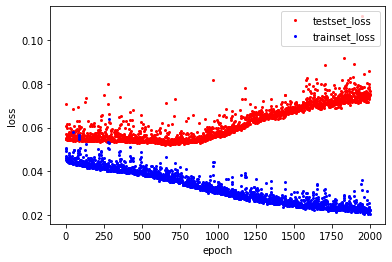

In [ ]:
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss,"o", c='red',markersize=2, label="testset_loss")
plt.plot(x_len, y_loss,"o", c='blue',markersize=2, label="trainset_loss")

plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='upper right')
plt.show()

# 선형 회귀를 적용하여 
- 데이터를 기반으로 미래의 수치를 예측하는 문제

In [ ]:
import pandas as pd

In [ ]:
df= pd.read_csv("/content/gdrive/MyDrive/Colab/data/housing.csv", delim_whitespace=True, header=None) # 공백으로 구분
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       506 non-null    float64
 1   1       506 non-null    float64
 2   2       506 non-null    float64
 3   3       506 non-null    int64  
 4   4       506 non-null    float64
 5   5       506 non-null    float64
 6   6       506 non-null    float64
 7   7       506 non-null    float64
 8   8       506 non-null    int64  
 9   9       506 non-null    float64
 10  10      506 non-null    float64
 11  11      506 non-null    float64
 12  12      506 non-null    float64
 13  13      506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.model_selection import train_test_split

In [ ]:
data = df.values
x=data[:,0:13]
y=data[:,13]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


In [ ]:
model = Sequential()

model.add(Dense(30, input_dim=13, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1)) #ws

model.summary() 

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 30)                420       
_________________________________________________________________
dense_15 (Dense)             (None, 6)                 186       
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 7         
Total params: 613
Trainable params: 613
Non-trainable params: 0
_________________________________________________________________


- 출력층의 활성화 함수 없앰
- Dense 가중합(ws)만 계산
- 선형 회귀에서 가중합(ws)이 활성화 함수가 된다
- 항등함수를 만든다. (출력층에 활성화 함수가 없는것)

In [ ]:
model.compile( loss='mean_squared_error', optimizer='adam')

model.fit(x_train, y_train, epochs=200, batch_size=10)

Epoch 1/200
36/36 [==============================] - 1s 3ms/step - loss: 947.3772
Epoch 2/200
36/36 [==============================] - 0s 3ms/step - loss: 565.6769
Epoch 3/200
36/36 [==============================] - 0s 3ms/step - loss: 463.4813
Epoch 4/200
36/36 [==============================] - 0s 4ms/step - loss: 219.8228
Epoch 5/200
36/36 [==============================] - 0s 3ms/step - loss: 177.5109
Epoch 6/200
36/36 [==============================] - 0s 3ms/step - loss: 155.3385
Epoch 7/200
36/36 [==============================] - 0s 3ms/step - loss: 139.8050
Epoch 8/200
36/36 [==============================] - 0s 2ms/step - loss: 130.3652
Epoch 9/200
36/36 [==============================] - 0s 2ms/step - loss: 111.8800
Epoch 10/200
36/36 [==============================] - 0s 2ms/step - loss: 100.0257
Epoch 11/200
36/36 [==============================] - 0s 2ms/step - loss: 89.7428
Epoch 12/200
36/36 [==============================] - 0s 2ms/step - loss: 81.1078
Epoch 13/200
36

# 회귀 평가
- MSE
- MAE
- 실제 값 - 오차